In [1]:
import numpy as np
import matplotlib.pyplot as plt

print("=== Euler Method for Solving dy/dx = f(x, y) ===\n")

# Define the differential equation
print("Choose a predefined function or write your own.")
print("Example format: x + y  OR  y - x**2 + 1")
user_func = input("Enter function f(x,y) = ")

# Convert input string to a Python lambda safely
try:
    f = eval(f"lambda x, y: {user_func}")
except:
    print("❌ Invalid function format. Example: x + y or y - x**2 + 1")
    exit()

try:
    # Get user inputs
    x0 = float(input("Enter initial x0: "))
    y0 = float(input("Enter initial y0: "))
    h = float(input("Enter step size (h): "))
    n = int(input("Enter number of steps (n): "))

    # Initialize arrays
    x = np.linspace(x0, x0 + n * h, n + 1)
    y = np.zeros(n + 1)
    y[0] = y0

    # Euler Iteration
    for i in range(n):
        y[i + 1] = y[i] + h * f(x[i], y[i])

    # Display results
    print("\n--- Euler Method Results ---")
    for i in range(n + 1):
        print(f"x[{i}] = {x[i]:.4f}, y[{i}] = {y[i]:.6f}")

    # Plotting
    plt.figure(figsize=(8, 5))
    plt.plot(x, y, 'o-', label='Euler Approximation', color='blue')
    plt.title(f"Euler Method Solution for dy/dx = {user_func}")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True, alpha=0.4)
    plt.legend()
    plt.show()

except ValueError:
    print("❌ Invalid input. Please enter numeric values.")
except Exception as e:
    print("⚠️ Error:", e)


=== Euler Method for Solving dy/dx = f(x, y) ===

Choose a predefined function or write your own.
Example format: x + y  OR  y - x**2 + 1


Enter function f(x,y) =  x**2+y+4x


❌ Invalid function format. Example: x + y or y - x**2 + 1


Enter initial x0:  x+y**2


❌ Invalid input. Please enter numeric values.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# ==========================
# Picard Iteration Method
# ==========================

def f(x, y):
    """Example differential equation: dy/dx = x + y"""
    return x + y

def picard_iteration(x0, y0, xn, h):
    """Approximate solution of dy/dx = f(x, y) using Picard Iteration (Trapezoidal)"""
    x = np.arange(x0, xn + h, h)
    y = np.zeros(len(x))
    y[0] = y0

    for i in range(1, len(x)):
        # Trapezoidal integration approximation of ∫f(x, y) dx
        y[i] = y0 + np.trapz(f(x[:i+1], y[:i+1]), x[:i+1])
    return x, y


# ==========================
# User Input Section
# ==========================
print("=== Picard Iteration Method Solver ===")
print("Solving: dy/dx = x + y  with initial condition y(0) = 1")

try:
    x0 = float(input("Enter initial x₀ (default 0): ") or "0")
    y0 = float(input("Enter initial y₀ (default 1): ") or "1")
    xn = float(input("Enter final xₙ (default 2): ") or "2")
    h = float(input("Enter step size h (default 0.2): ") or "0.2")
except ValueError:
    print("❌ Invalid input! Please enter numeric values.")
    exit()

# ==========================
# Compute and Display Result
# ==========================
x, y = picard_iteration(x0, y0, xn, h)

print("\nResults:")
for xi, yi in zip(x, y):
    print(f"x = {xi:.3f}, y ≈ {yi:.6f}")

# ==========================
# Plot the Result
# ==========================
plt.figure(figsize=(8,5))
plt.plot(x, y, 'o-', label='Picard Iteration')
plt.xlabel('x')
plt.ylabel('y')
plt.title(f"Picard Iteration Method for dy/dx = x + y\nInitial y({x0})={y0}, step size h={h}")
plt.grid(True)
plt.legend()
plt.show()


=== Picard Iteration Method Solver ===
Solving: dy/dx = x + y  with initial condition y(0) = 1


Enter initial x₀ (default 0):  x+y


❌ Invalid input! Please enter numeric values.


NameError: name 'x0' is not defined

=== Milne's Predictor-Corrector Method ===
Solving dy/dx = x + y with initial y(x0) = y0


Enter initial x₀ (default 0):  0.1
Enter initial y₀ (default 1):  1
Enter step size h (default 0.2):  0.01
Enter number of steps n (default 10):  10



Results:
x = 0.100, y ≈ 1.000000
x = 0.110, y ≈ 1.011000
x = 0.120, y ≈ 1.022210
x = 0.130, y ≈ 1.033632
x = 0.140, y ≈ 1.045485
x = 0.150, y ≈ 1.057343
x = 0.160, y ≈ 1.069633
x = 0.170, y ≈ 1.081935
x = 0.180, y ≈ 1.094673
x = 0.190, y ≈ 1.107429
x = 0.200, y ≈ 1.120623


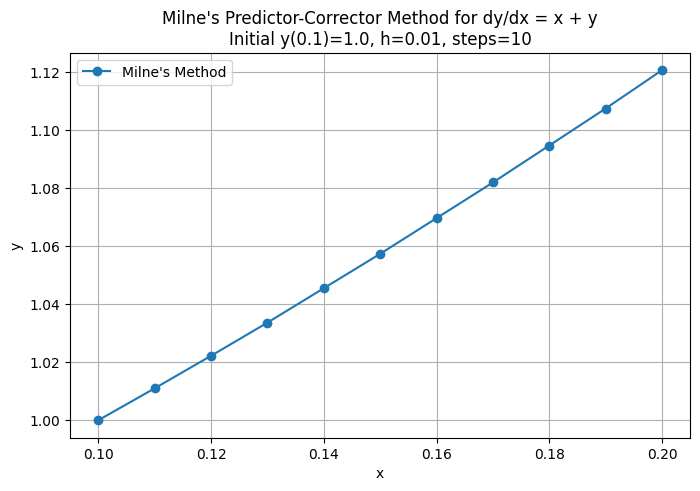

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# =========================
# Milne's Predictor-Corrector Method
# =========================

def f(x, y):
    """Example differential equation dy/dx = x + y"""
    return x + y

def milne_method(f, x0, y0, h, n):
    """Solve dy/dx = f(x, y) using Milne's Predictor-Corrector"""
    x = np.linspace(x0, x0 + n*h, n+1)
    y = np.zeros(n+1)
    
    # Initial values (using Euler's method)
    y[0] = y0
    for i in range(1,4):
        y[i] = y[i-1] + h*f(x[i-1], y[i-1])
    
    # Milne's Predictor-Corrector
    for i in range(3, n):
        # Predictor
        yp = y[i-3] + 4*h/3*(2*f(x[i-2], y[i-2]) - f(x[i-1], y[i-1]) + 2*f(x[i], y[i]))
        # Corrector
        y[i+1] = y[i-1] + h/3*(f(x[i-1], y[i-1]) + 4*f(x[i], y[i]) + f(x[i+1], yp))
    
    return x, y

# =========================
# User Input Section
# =========================
print("=== Milne's Predictor-Corrector Method ===")
print("Solving dy/dx = x + y with initial y(x0) = y0")

try:
    x0 = float(input("Enter initial x₀ (default 0): ") or "0")
    y0 = float(input("Enter initial y₀ (default 1): ") or "1")
    h = float(input("Enter step size h (default 0.2): ") or "0.2")
    n = int(input("Enter number of steps n (default 10): ") or "10")
except ValueError:
    print("❌ Invalid input! Please enter numeric values.")
    exit()

# =========================
# Compute solution
# =========================
x, y = milne_method(f, x0, y0, h, n)

print("\nResults:")
for xi, yi in zip(x, y):
    print(f"x = {xi:.3f}, y ≈ {yi:.6f}")

# =========================
# Plotting
# =========================
plt.figure(figsize=(8,5))
plt.plot(x, y, 'o-', label="Milne's Method")
plt.xlabel('x')
plt.ylabel('y')
plt.title(f"Milne's Predictor-Corrector Method for dy/dx = x + y\nInitial y({x0})={y0}, h={h}, steps={n}")
plt.grid(True)
plt.legend()
plt.show()
